In [85]:
import pandas as pd 
import numpy as np
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [86]:
data = pd.read_csv(r"C:\Users\manju\Downloads\Employee-Attrition - Employee-Attrition.csv")

In [87]:
## drop columns
data.drop(columns=["EmployeeCount","EmployeeNumber","StandardHours","Over18","DailyRate", "EducationField", "NumCompaniesWorked"],axis=1, inplace=True)

In [88]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,2,Female,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,3,Male,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,4,Male,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,4,Female,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,1,Male,40,3,...,3,4,1,6,3,3,2,2,2,2


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EnvironmentSatisfaction   1470 non-null   int64 
 7   Gender                    1470 non-null   object
 8   HourlyRate                1470 non-null   int64 
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [90]:
data["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

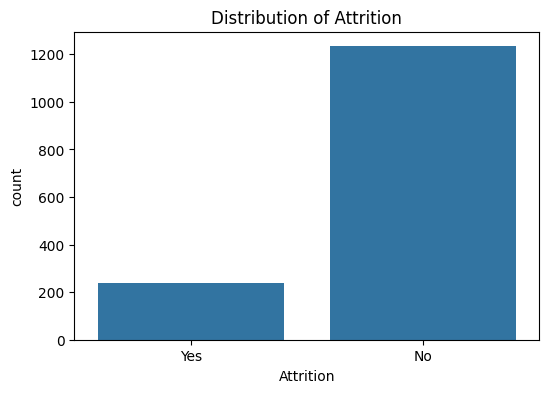

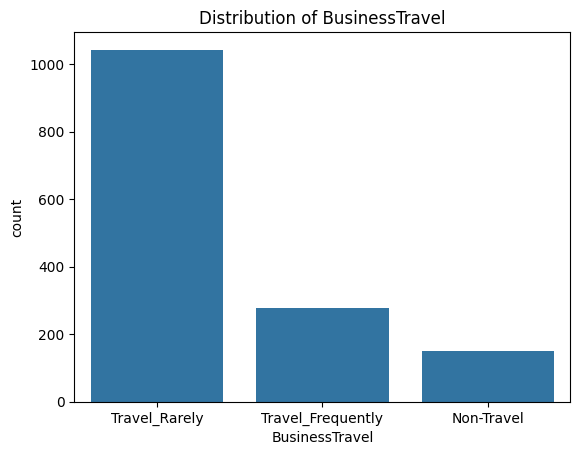

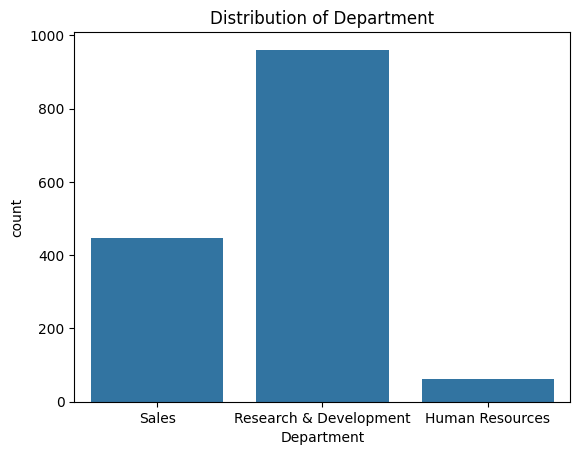

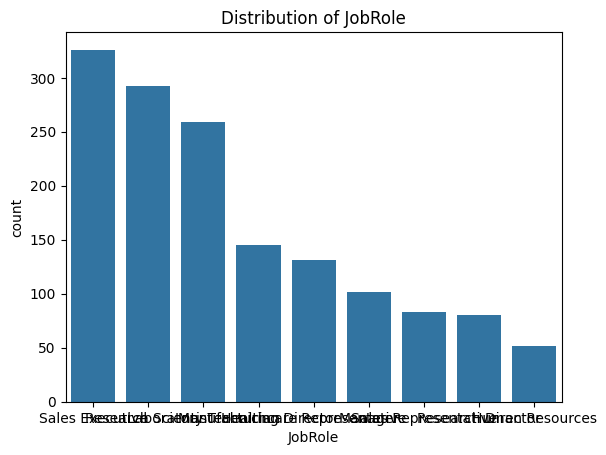

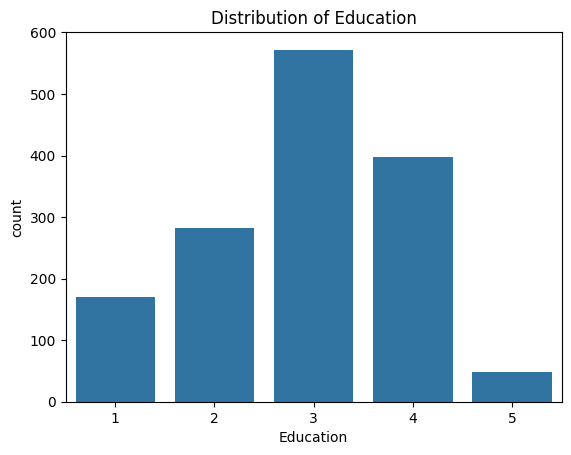

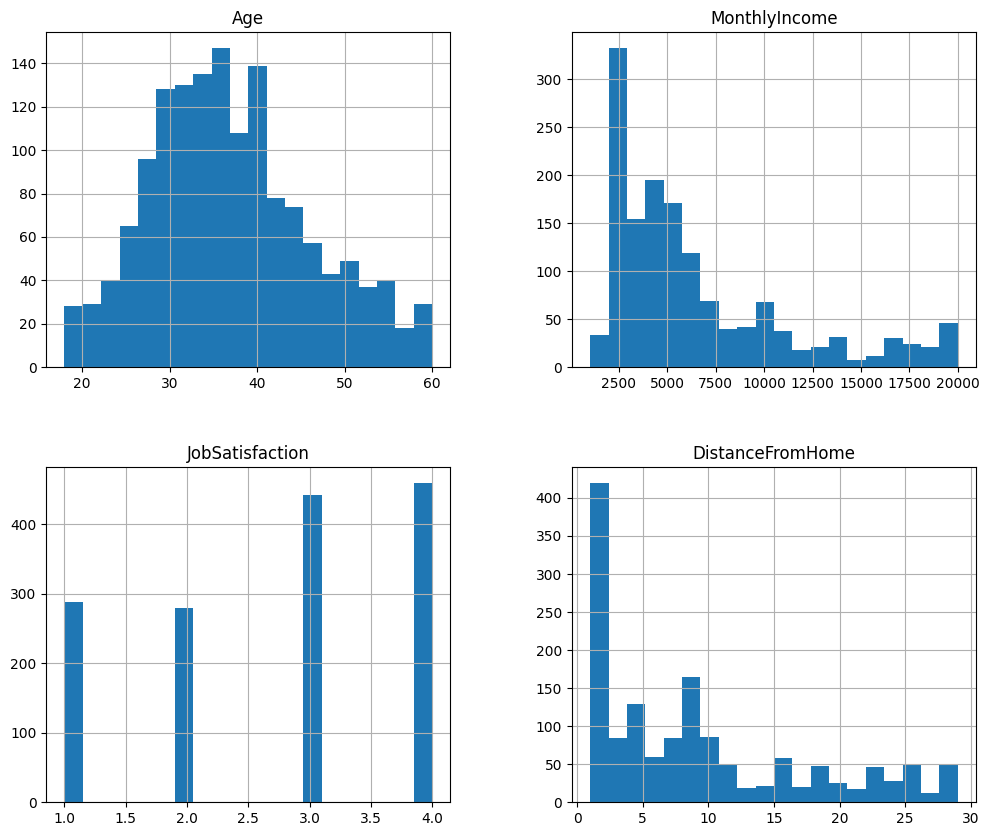

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot distribution of attrition(target variable)
plt.figure(figsize=(6,4))
sns.countplot(x="Attrition", data=data)
plt.title("Distribution of Attrition")
plt.show()

# plot distribution of a few key categorical variables
categorical_cols=["BusinessTravel","Department","JobRole","Education"]
for col  in categorical_cols:
    plt.Figure(figsize=(6,4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.show()

# Histogram for numerical features
numerical_cols=["Age","MonthlyIncome","JobSatisfaction","DistanceFromHome"]
data[numerical_cols].hist(bins=20,figsize=(12,10),layout=(2,2))
plt.show()

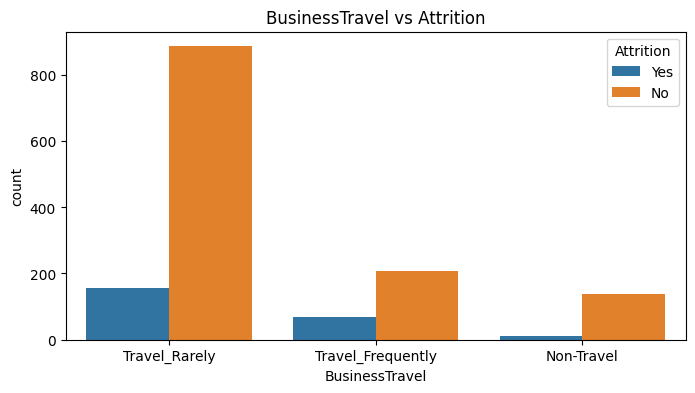

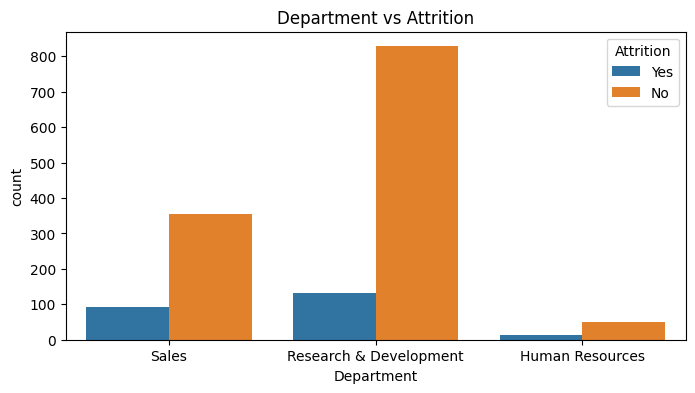

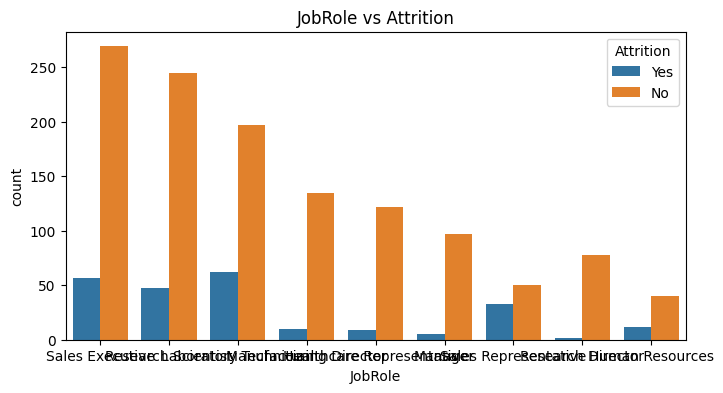

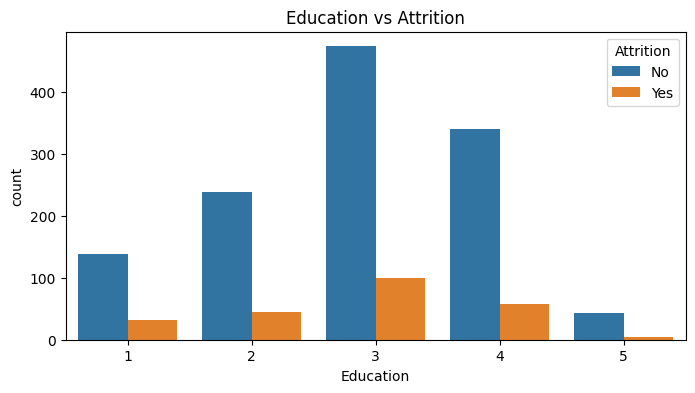

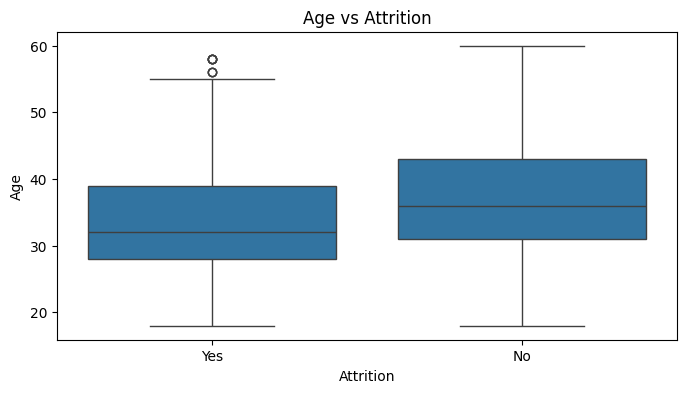

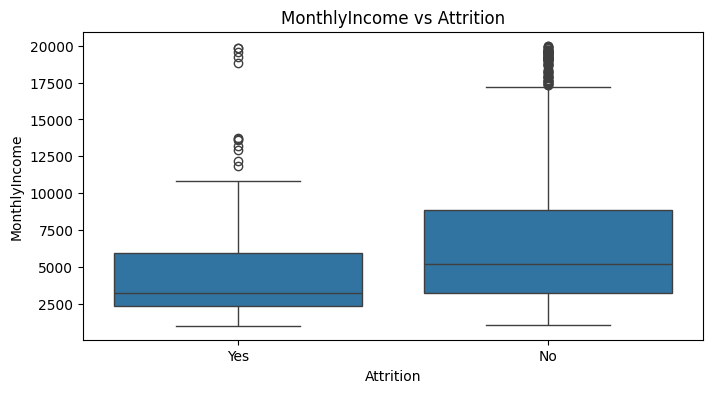

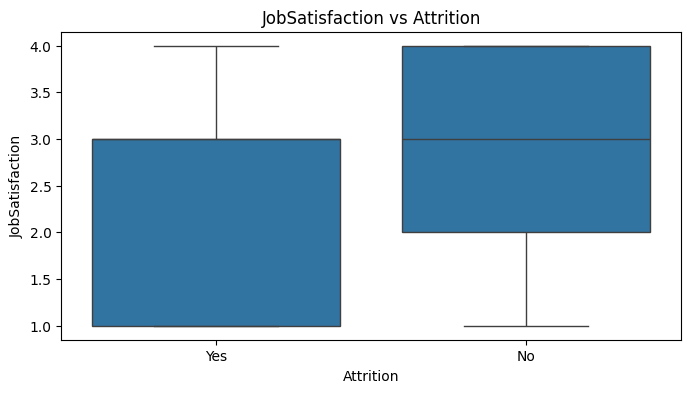

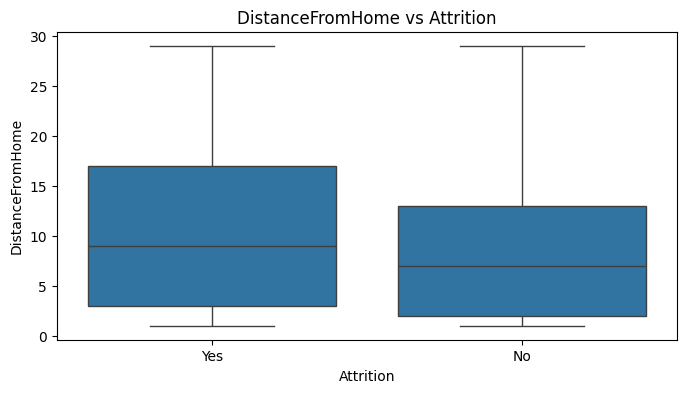

In [92]:
# categorical vs target(Attrition)
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue="Attrition", data=data)
    plt.title(f"{col} vs Attrition")
    plt.show()

# Boxplots for numerical features vs Attrition
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x="Attrition",y=col, data=data)
    plt.title(f"{col} vs Attrition")
    plt.show()


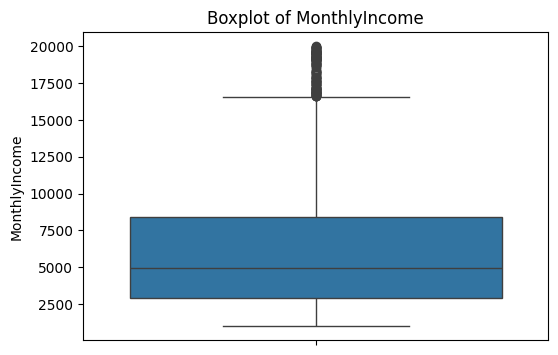

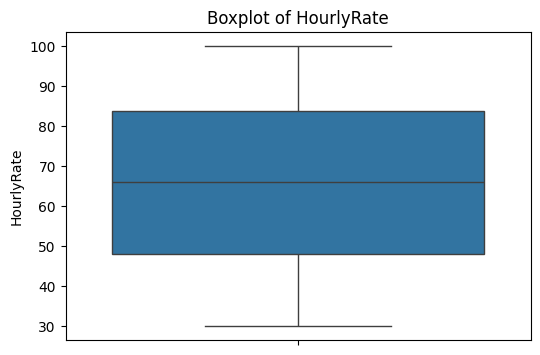

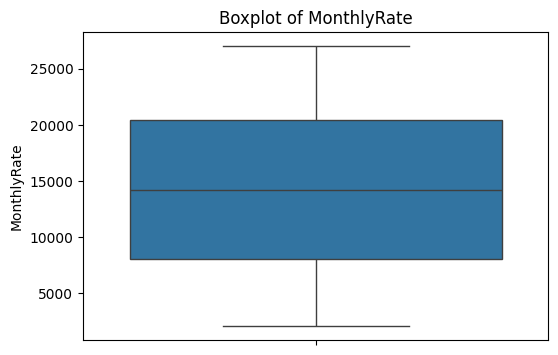

In [93]:
# Detecting outlier using boxplots
for col in ["MonthlyIncome", "HourlyRate", "MonthlyRate"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [94]:
# data preprocessing
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [95]:
data.select_dtypes(object)

,Attrition,BusinessTravel,Department,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Male,Sales Executive,Married,No


## Encoding categorical variables

In [96]:
## Encoding categorical variables
cat_cols = ["BusinessTravel", "Department", 
            "Gender", "JobRole", "MaritalStatus", "OverTime"]

oe = OrdinalEncoder()
data[cat_cols] = oe.fit_transform(data[cat_cols])


In [97]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,2.0,2.0,1,2,2,0.0,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,1.0,1.0,8,1,3,1.0,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,2.0,1.0,2,2,4,1.0,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,1.0,1.0,3,4,4,0.0,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,2.0,1.0,2,1,1,1.0,40,3,...,3,4,1,6,3,3,2,2,2,2


In [98]:

data["Attrition"] = data["Attrition"].map({"Yes": 1, "No": 0})

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   float64
 3   Department                1470 non-null   float64
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EnvironmentSatisfaction   1470 non-null   int64  
 7   Gender                    1470 non-null   float64
 8   HourlyRate                1470 non-null   int64  
 9   JobInvolvement            1470 non-null   int64  
 10  JobLevel                  1470 non-null   int64  
 11  JobRole                   1470 non-null   float64
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             1470 non-null   float64
 14  MonthlyI

In [100]:
from sklearn.preprocessing import StandardScaler

scale_cols = [
    "Age", "MonthlyIncome", "PercentSalaryHike", "TotalWorkingYears", "TrainingTimesLastYear",
    "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion",
    "YearsWithCurrManager"
]

scaler = StandardScaler()
data[scale_cols] = scaler.fit_transform(data[scale_cols])


## Model Building

In [ ]:
from sklearn.model_selection import train_test_split
# define feature and target variable
x= data.drop(columns=["Attrition"])
y= data["Attrition"]

# split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Model training

In [102]:
from sklearn.ensemble import RandomForestClassifier
#initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Model Evaluation

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
#predict on test
y_pred = model.predict(x_test)

print("Accuracy:" , accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:" , roc_auc_score(y_test, model.predict_proba(x_test)[:,1]))

Accuracy: 0.8662131519274376
Confusion Matrix:
 [[375   5]
 [ 54   7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.58      0.11      0.19        61

    accuracy                           0.87       441
   macro avg       0.73      0.55      0.56       441
weighted avg       0.83      0.87      0.83       441

ROC-AUC Score: 0.7962683347713545


In [108]:
import joblib
joblib.dump(model, 'Employee_Attrition_Encoded.csv')

['Employee_Attrition_Encoded.csv']